In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [99]:
df4 = pd.read_csv('ODS_PRISTUENRREGCUR.csv',header = 0, delimiter = ';') # Private Schools - Region - Curriculum - Number of students
df1 = pd.read_csv('ODS_PRISTUENRNATCUR.csv',header = 0, delimiter = ';') # Private Schools - Nationaility - Curriculum - Number of students
df2 = pd.read_csv('ODS_PRISTUENRFEECUR.csv',header = 0, delimiter = ';') # Private Schools - Tuition Fee - Curriculum - Number of students
df3 = pd.read_csv('ODS_PRISTUENRGRDCUR (1).csv',header = 0, delimiter = ';') # Private Schools - Grade - Curriculum - Number of students


In [100]:
df4.head()

,SCH_ACADEMIC_YEAR,SCH_EDUCATION_TYPE_EN,SCH_EDUCATION_TYPE_AR,SCH_REGION_EN,SCH_REGION_AR,STU_CURRICULUM_EN,STU_CURRICULUM_AR,N_STUDENTS_ENROLLED
0,2014/15,Private,خاص,ABU DHABI,أبوظبي,International Baccalaureate,خاص - بكالوريا دولية,2865
1,2015/16,Private,خاص,ABU DHABI,أبوظبي,Private SABIS,خاص - اجنبي,7023
2,2015/16,Private,خاص,AL AIN,العين,Private Iranian,خاص - ايراني,171
3,2015/16,Private,خاص,AL DHAFRA REGION,منطقة الظفرة,Private British,خاص - بريطاني,628
4,2015/16,Private,خاص,AL DHAFRA REGION,منطقة الظفرة,Private MoE,خاص - وزارة,1651


In [60]:
print(df1['N_STUDENTS_ENROLLED'].sum())
print(df2['N_STUDENTS_ENROLLED'].sum())
print(df3['N_STUDENTS_ENROLLED'].sum())
print(df4['N_STUDENTS_ENROLLED'].sum())


1690356
1690356
1690356
1690356


In [61]:

df1 = df1.drop(axis = 1, columns = ['STU_NATIONALITY_GROUP_AR','SCH_EDUCATION_TYPE_AR','STU_CURRICULUM_AR'])
df2 = df2.drop(axis = 1, columns = ['SCH_EDUCATION_TYPE_AR','STU_CURRICULUM_AR'])
df3 = df3.drop(axis = 1, columns = ['SCH_EDUCATION_TYPE_AR','STU_CURRICULUM_AR'])
df4 = df4.drop(axis = 1, columns = ['SCH_EDUCATION_TYPE_AR','STU_CURRICULUM_AR','SCH_REGION_AR'])


df4['SCH_ACADEMIC_YEAR'] = df4['SCH_ACADEMIC_YEAR'].apply(lambda x: pd.to_datetime(x.split('/')[0]))
df3['SCH_ACADEMIC_YEAR'] = df3['SCH_ACADEMIC_YEAR'].apply(lambda x: pd.to_datetime(x.split('/')[0]))
df2['SCH_ACADEMIC_YEAR'] = df2['SCH_ACADEMIC_YEAR'].apply(lambda x: pd.to_datetime(x.split('/')[0]))
df1['SCH_ACADEMIC_YEAR'] = df1['SCH_ACADEMIC_YEAR'].apply(lambda x: pd.to_datetime(x.split('/')[0]))

df2 = df2[df2['SCH_TUITION_FEE_CATEGORY'] != 'Not Available']


In [35]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)
df4.head()

Index(['SCH_ACADEMIC_YEAR', 'SCH_EDUCATION_TYPE_EN',
       'STU_NATIONALITY_GROUP_EN', 'STU_CURRICULUM_EN', 'N_STUDENTS_ENROLLED'],
      dtype='object')
Index(['SCH_ACADEMIC_YEAR', 'SCH_EDUCATION_TYPE_EN',
       'SCH_TUITION_FEE_CATEGORY', 'STU_CURRICULUM_EN', 'N_STUDENTS_ENROLLED'],
      dtype='object')
Index(['SCH_ACADEMIC_YEAR', 'SCH_EDUCATION_TYPE_EN', 'STU_GRADE_EN',
       'STU_CURRICULUM_EN', 'N_STUDENTS_ENROLLED'],
      dtype='object')
Index(['SCH_ACADEMIC_YEAR', 'SCH_EDUCATION_TYPE_EN', 'SCH_REGION_EN',
       'STU_CURRICULUM_EN', 'N_STUDENTS_ENROLLED'],
      dtype='object')


,SCH_ACADEMIC_YEAR,SCH_EDUCATION_TYPE_EN,SCH_REGION_EN,STU_CURRICULUM_EN,N_STUDENTS_ENROLLED
0,2014-01-01,Private,ABU DHABI,International Baccalaureate,2865
1,2015-01-01,Private,ABU DHABI,Private SABIS,7023
2,2015-01-01,Private,AL AIN,Private Iranian,171
3,2015-01-01,Private,AL DHAFRA REGION,Private British,628
4,2015-01-01,Private,AL DHAFRA REGION,Private MoE,1651


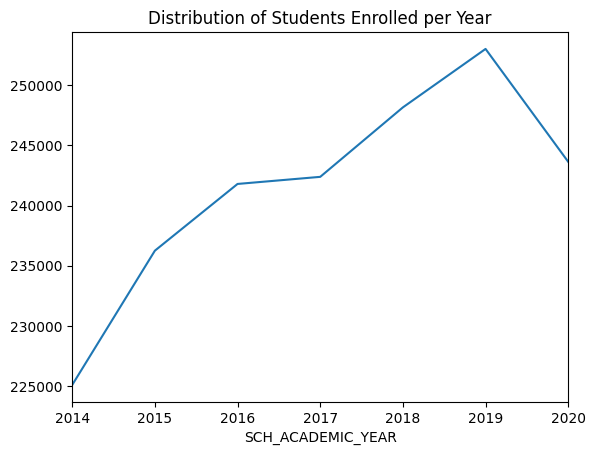

In [67]:
df4.groupby('SCH_ACADEMIC_YEAR')['N_STUDENTS_ENROLLED'].sum().plot(kind='line')
plt.title('Distribution of Students Enrolled per Year')
plt.show()

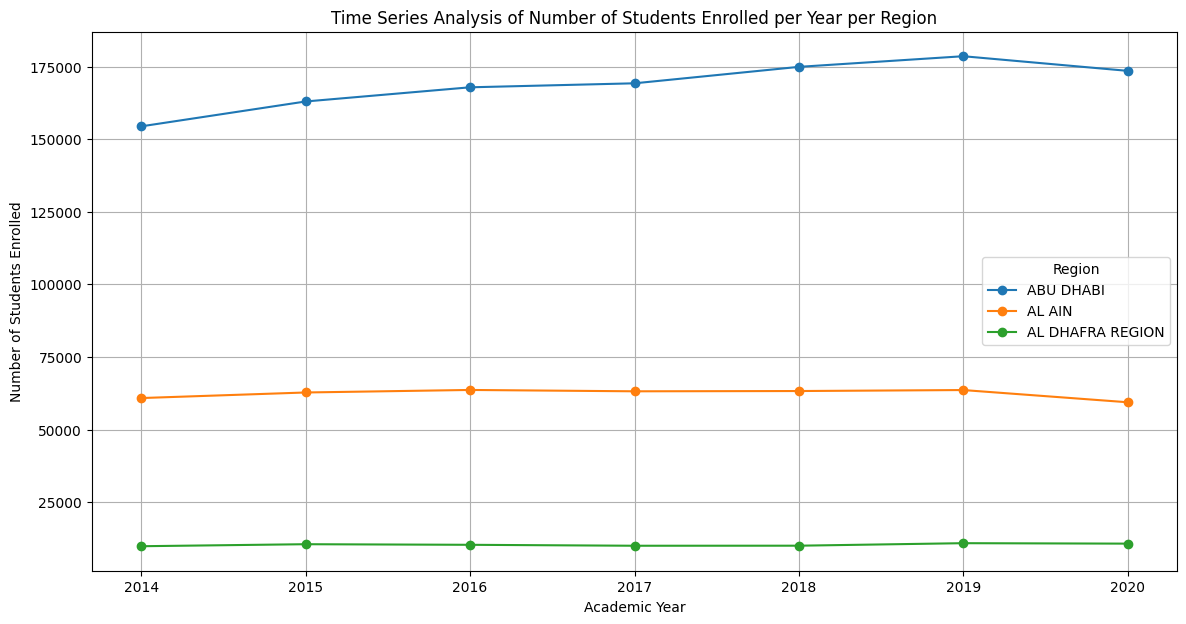

In [38]:


# Group by Academic Year and Education Type and sum the number of students enrolled
grouped_df = df4.groupby(['SCH_ACADEMIC_YEAR', 'SCH_REGION_EN'])['N_STUDENTS_ENROLLED'].sum().reset_index()

# Pivot the DataFrame to have Academic Years as index, Education Types as columns and the number of students as values
pivot_df = grouped_df.pivot(index='SCH_ACADEMIC_YEAR', columns='SCH_REGION_EN', values='N_STUDENTS_ENROLLED')

# Plot the time series data
plt.figure(figsize=(14,7))
plt.plot(pivot_df, marker='o')
plt.title('Time Series Analysis of Number of Students Enrolled per Year per Region')
plt.xlabel('Academic Year')
plt.ylabel('Number of Students Enrolled')
plt.legend(title='Region', labels=pivot_df.columns)
plt.grid(True)
plt.show()


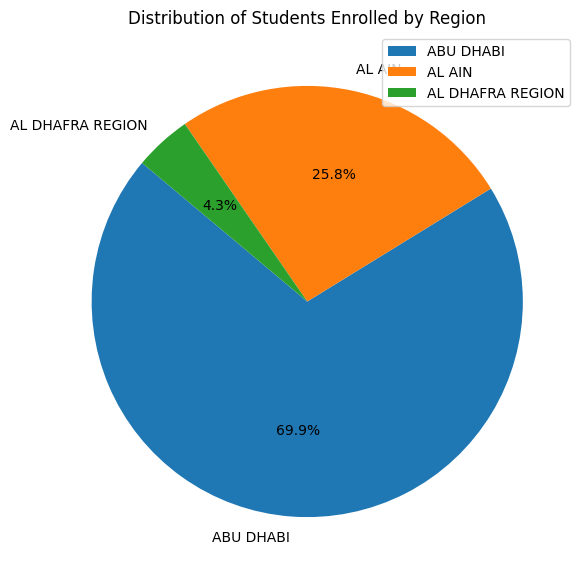

SCH_EDUCATION_TYPE_EN,Private
SCH_REGION_EN,
ABU DHABI,1181350
AL AIN,436703
AL DHAFRA REGION,72303


In [68]:
education_type_distribution = df4.groupby('SCH_REGION_EN')['N_STUDENTS_ENROLLED'].sum()
pivot_table = pd.pivot_table(df4, values='N_STUDENTS_ENROLLED', index=['SCH_REGION_EN'], columns=['SCH_EDUCATION_TYPE_EN'], aggfunc=np.sum)
pivot_table
# Plot the Pie Chart
plt.figure(figsize=(10,7))
education_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=True)
plt.ylabel('')  # This is to remove the default ylabel which is not necessary for a pie chart
plt.title('Distribution of Students Enrolled by Region')
plt.show()
pivot_table

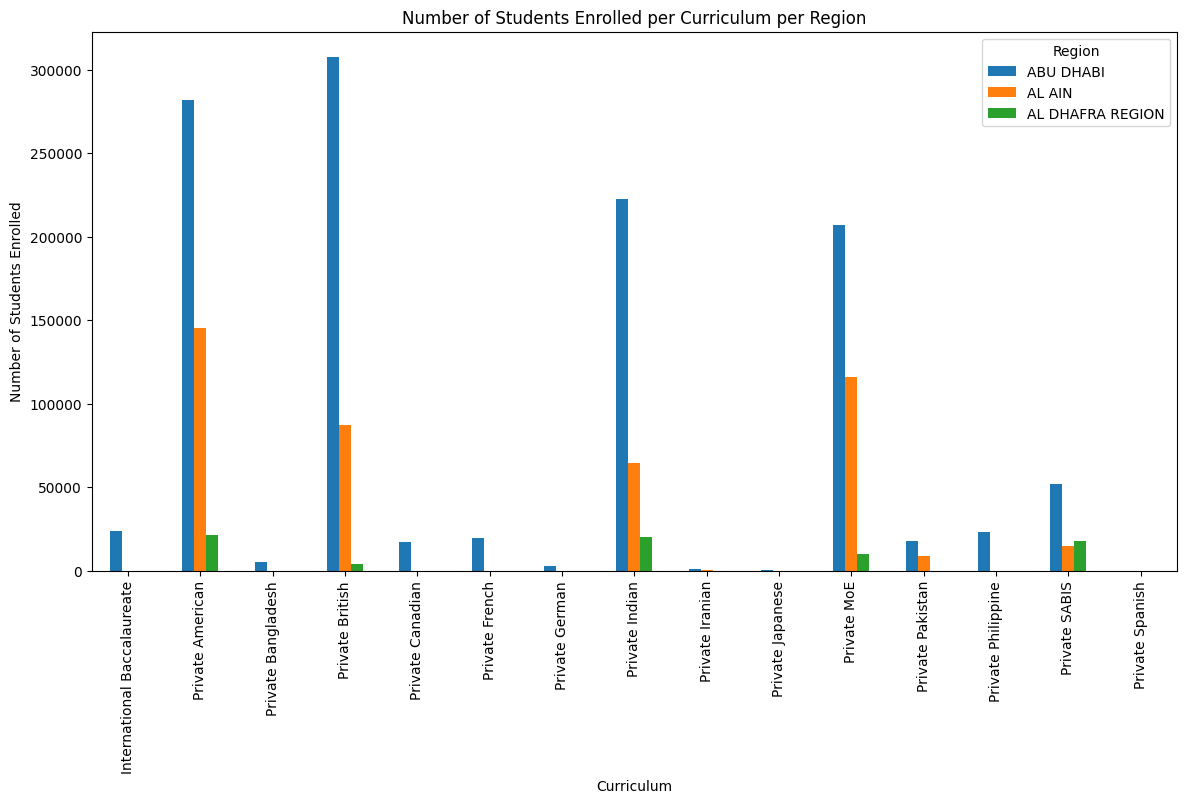

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Curriculum and Region and sum the number of students enrolled
grouped_df = df4.groupby(['STU_CURRICULUM_EN', 'SCH_REGION_EN'])['N_STUDENTS_ENROLLED'].sum().reset_index()

# Pivot the DataFrame to have Curriculum as index, Region as columns, and the number of students as values
pivot_df = grouped_df.pivot(index='STU_CURRICULUM_EN', columns='SCH_REGION_EN', values='N_STUDENTS_ENROLLED')

# Plot the bar chart
pivot_df.plot(kind='bar', figsize=(14,7))
plt.title('Number of Students Enrolled per Curriculum per Region')
plt.xlabel('Curriculum')
plt.ylabel('Number of Students Enrolled')
plt.legend(title='Region')
plt.show()


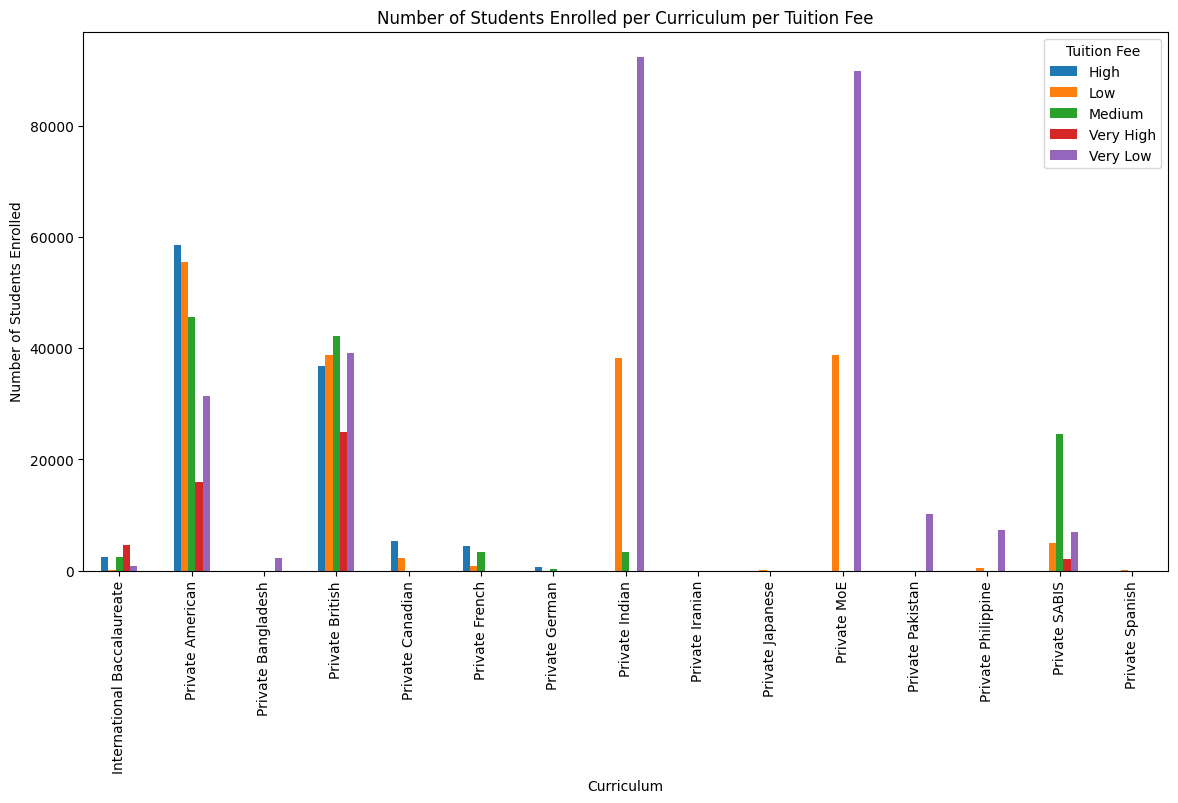

In [63]:



# Group by Curriculum and Region and sum the number of students enrolled
grouped_df = df2.groupby(['STU_CURRICULUM_EN', 'SCH_TUITION_FEE_CATEGORY'])['N_STUDENTS_ENROLLED'].sum().reset_index()

# Pivot the DataFrame to have Curriculum as index, Region as columns, and the number of students as values
pivot_df = grouped_df.pivot(index='STU_CURRICULUM_EN', columns='SCH_TUITION_FEE_CATEGORY', values='N_STUDENTS_ENROLLED')

# Plot the bar chart
pivot_df.plot(kind='bar', figsize=(14,7))
plt.title('Number of Students Enrolled per Curriculum per Tuition Fee')
plt.xlabel('Curriculum')
plt.ylabel('Number of Students Enrolled')
plt.legend(title='Tuition Fee')
plt.show()


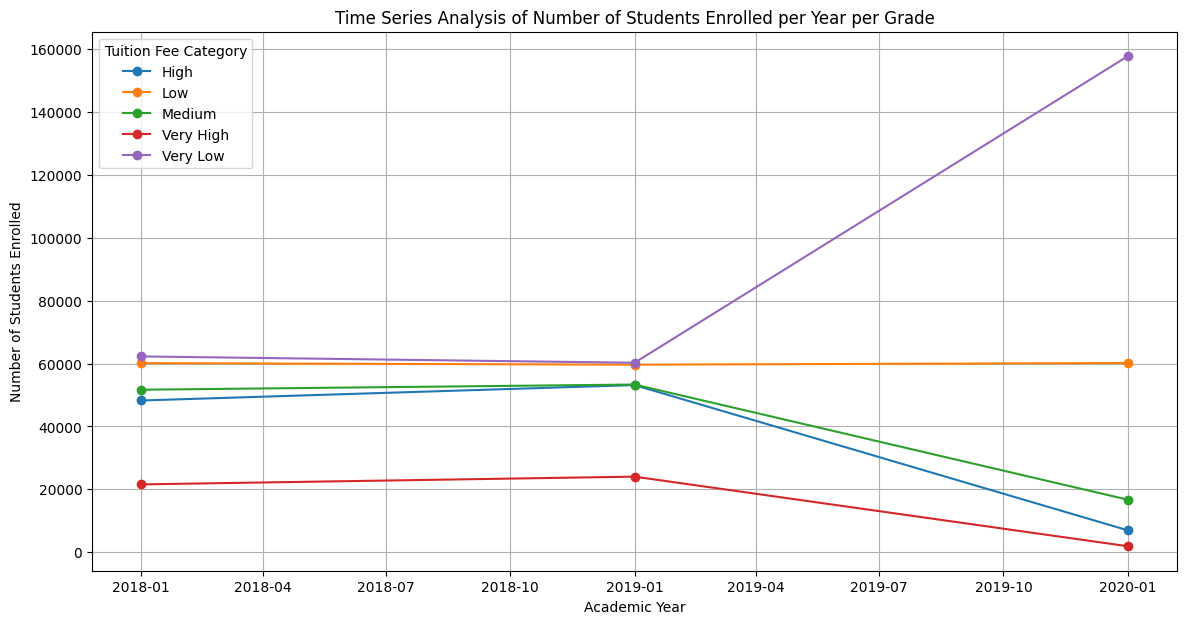

In [47]:
# Group by Academic Year and Education Type and sum the number of students enrolled
# df2 = df2[df2['SCH_TUITION_FEE_CATEGORY'] != 'Not Available']
grouped_df = df2.groupby(['SCH_ACADEMIC_YEAR', 'SCH_TUITION_FEE_CATEGORY'])['N_STUDENTS_ENROLLED'].sum().reset_index()

# Pivot the DataFrame to have Academic Years as index, Education Types as columns and the number of students as values
pivot_df = grouped_df.pivot(index='SCH_ACADEMIC_YEAR', columns='SCH_TUITION_FEE_CATEGORY', values='N_STUDENTS_ENROLLED')

# Plot the time series data
plt.figure(figsize=(14,7))
plt.plot(pivot_df, marker='o')
plt.title('Time Series Analysis of Number of Students Enrolled per Year per Grade')
plt.xlabel('Academic Year')
plt.ylabel('Number of Students Enrolled')
plt.legend(title='Tuition Fee Category', labels=pivot_df.columns)
plt.grid(True)
plt.show()

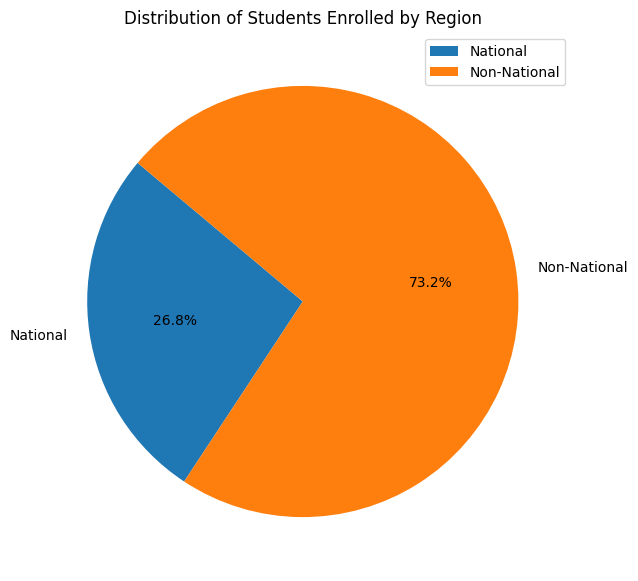

SCH_EDUCATION_TYPE_EN,Private
STU_NATIONALITY_GROUP_EN,
National,453602
Non-National,1236754


In [76]:
education_type_distribution = df1.groupby('STU_NATIONALITY_GROUP_EN')['N_STUDENTS_ENROLLED'].sum()
pivot_table = pd.pivot_table(df1, values='N_STUDENTS_ENROLLED', index=['STU_NATIONALITY_GROUP_EN'], columns=['SCH_EDUCATION_TYPE_EN'], aggfunc=np.sum)
pivot_table
# Plot the Pie Chart
plt.figure(figsize=(10,7))
education_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=True)
plt.ylabel('')
plt.title('Distribution of Students Enrolled by Region')
plt.show()
pivot_table

In [102]:
#ChatGPT

UsageError: Line magic function `%md` not found.


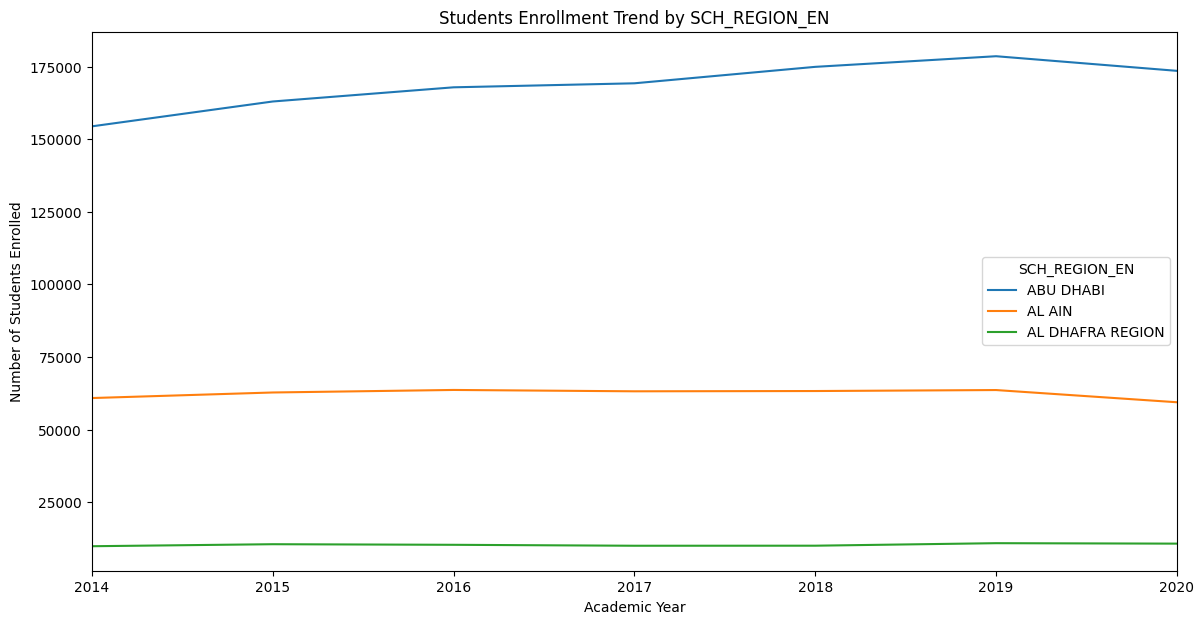

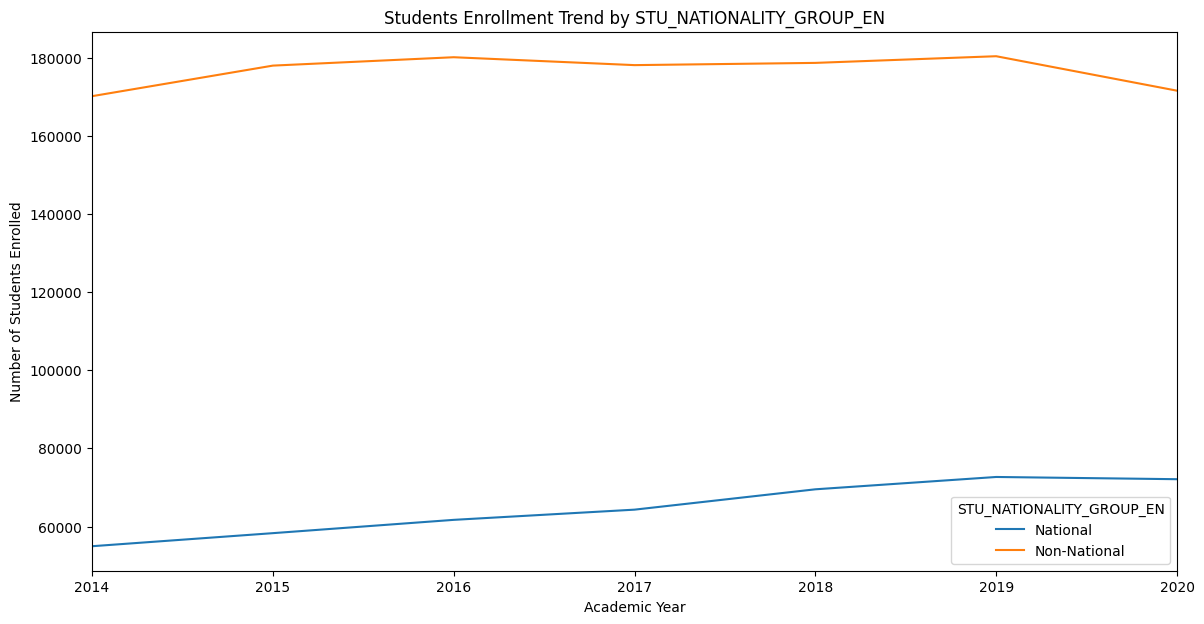

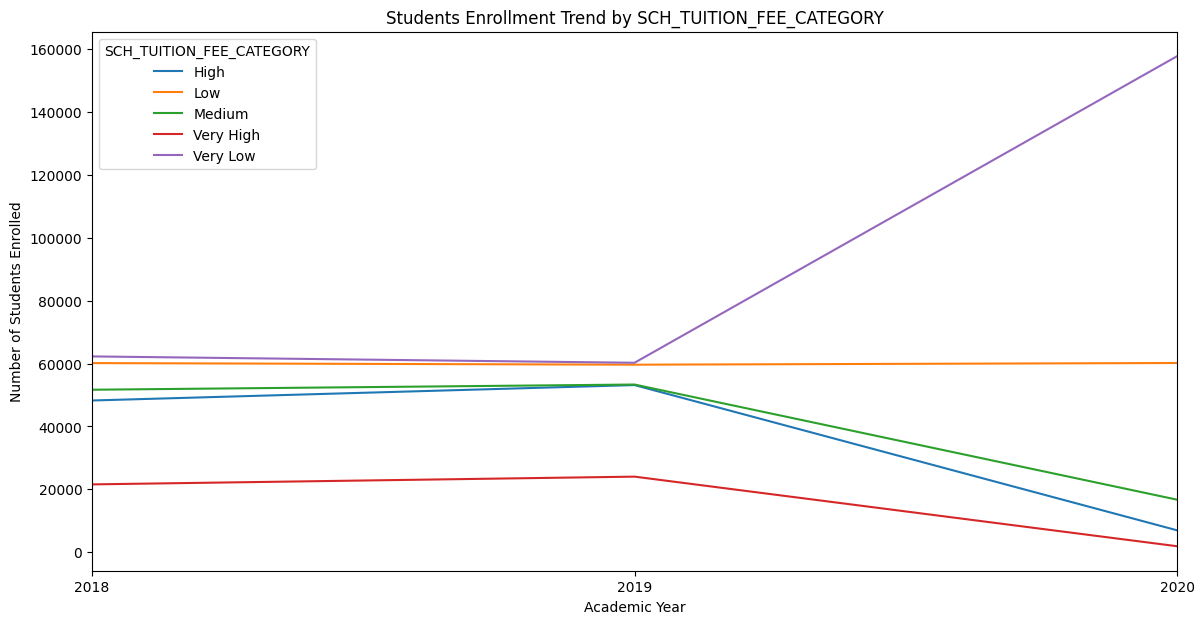

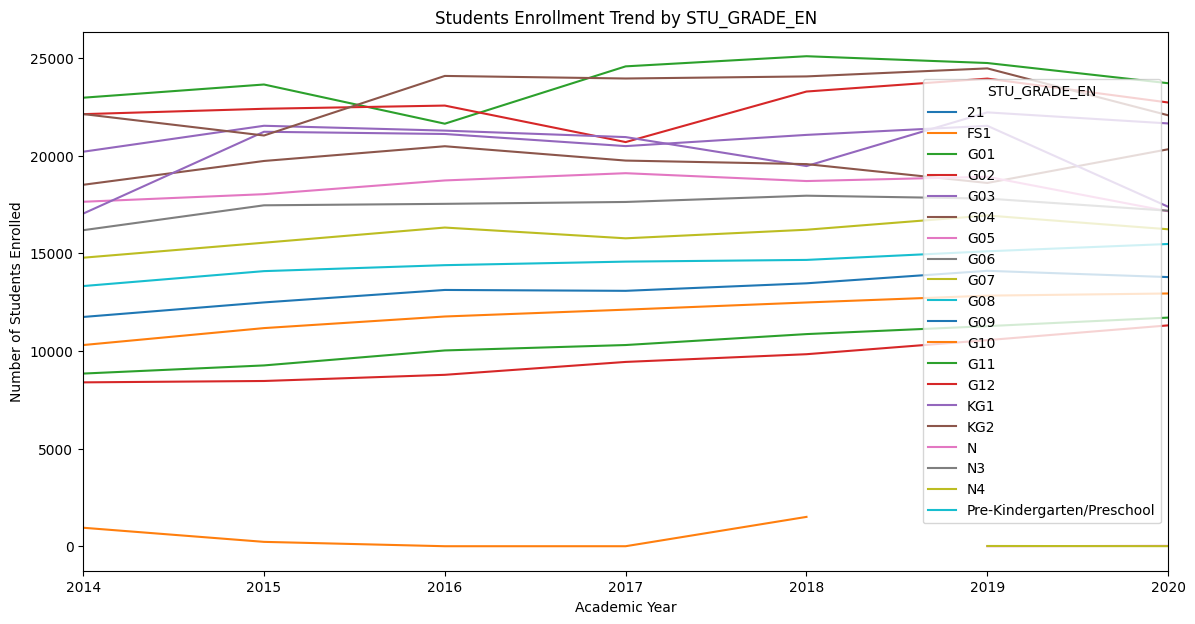

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

# Analyzing Student Enrollment Trends over the Years for each DataFrame
dataframes = [df4, df1, df2, df3]
titles = ["SCH_REGION_EN", "STU_NATIONALITY_GROUP_EN", "SCH_TUITION_FEE_CATEGORY", "STU_GRADE_EN"]

for i, df in enumerate(dataframes):
    plt.figure(figsize=(14,7))
    df.groupby(['SCH_ACADEMIC_YEAR', titles[i]])['N_STUDENTS_ENROLLED'].sum().unstack().plot(ax=plt.gca())
    plt.title(f'Students Enrollment Trend by {titles[i]}')
    plt.xlabel('Academic Year')
    plt.ylabel('Number of Students Enrolled')
    plt.legend(title=titles[i])
    plt.show()


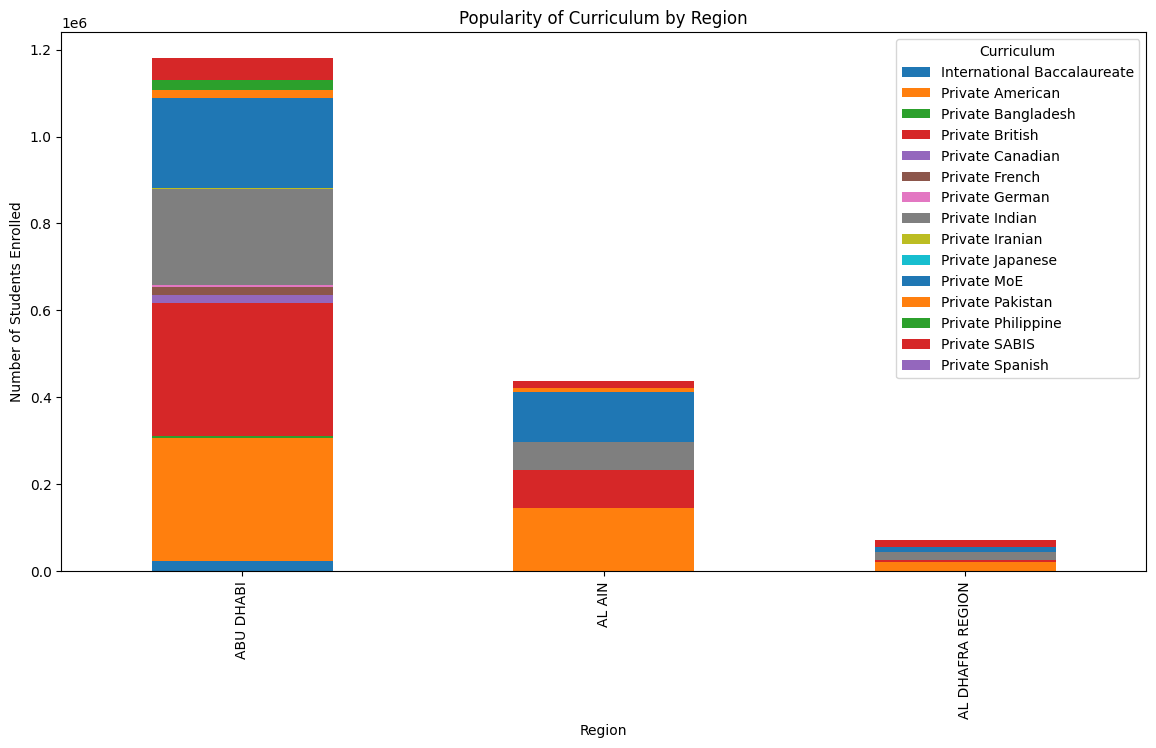

In [84]:
# Grouping by Region and Curriculum and summing the number of students enrolled
grouped_df = df4.groupby(['SCH_REGION_EN', 'STU_CURRICULUM_EN'])['N_STUDENTS_ENROLLED'].sum().reset_index()

# Pivot DataFrame for better visualization
pivot_df = grouped_df.pivot(index='SCH_REGION_EN', columns='STU_CURRICULUM_EN', values='N_STUDENTS_ENROLLED')

# Bar Chart Visualization
pivot_df.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Popularity of Curriculum by Region')
plt.xlabel('Region')
plt.ylabel('Number of Students Enrolled')
plt.legend(title='Curriculum')
plt.show()


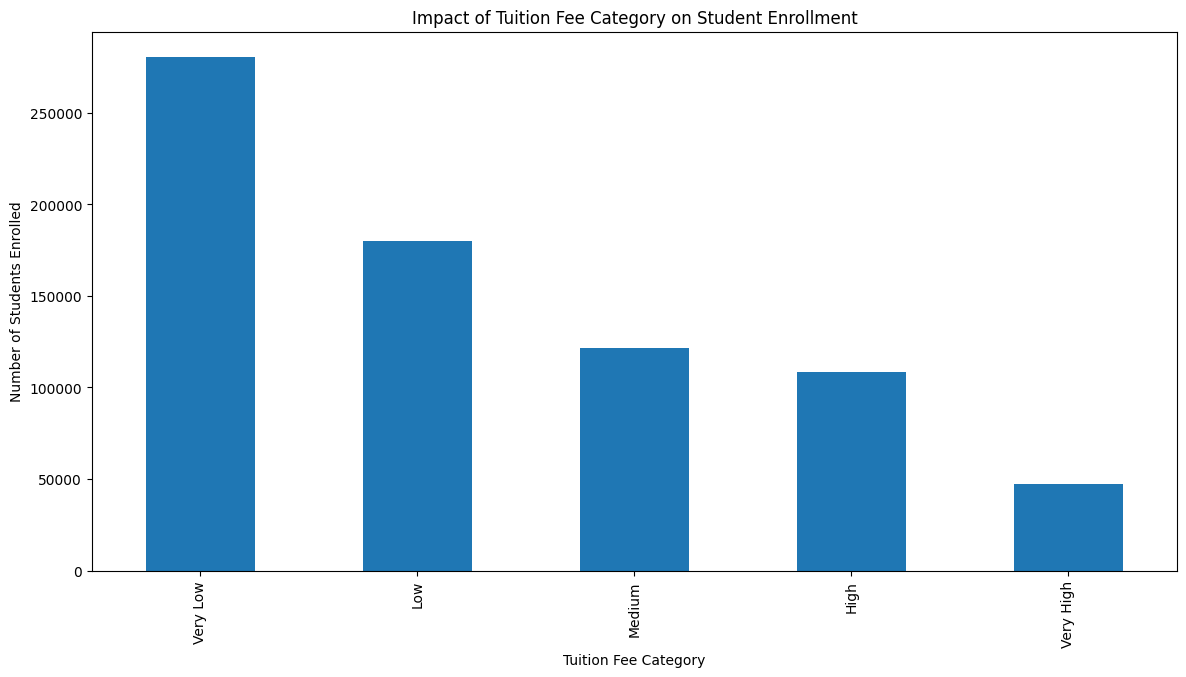

In [83]:
# Grouping by Tuition Fee Category and summing the number of students enrolled
tuition_df = df2.groupby('SCH_TUITION_FEE_CATEGORY')['N_STUDENTS_ENROLLED'].sum().sort_values(ascending=False)

# Bar Chart Visualization
tuition_df.plot(kind='bar', figsize=(14,7))
plt.title('Impact of Tuition Fee Category on Student Enrollment')
plt.xlabel('Tuition Fee Category')
plt.ylabel('Number of Students Enrolled')
plt.show()


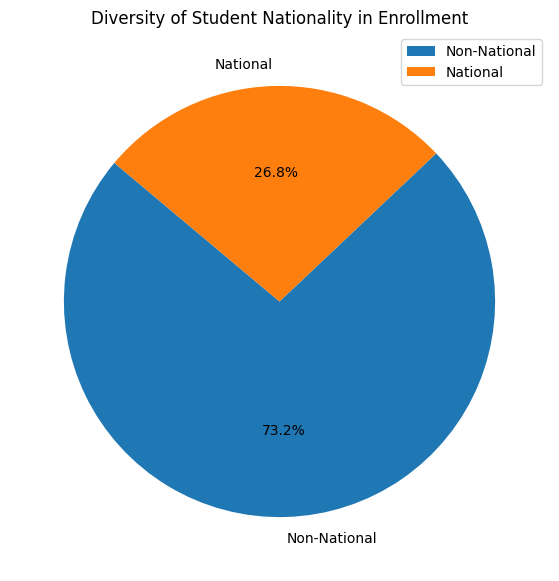

In [88]:
# Grouping by Student Nationality Group and summing the number of students enrolled
nationality_df = df1.groupby('STU_NATIONALITY_GROUP_EN')['N_STUDENTS_ENROLLED'].sum().sort_values(ascending=False)

# Pie Chart Visualization
nationality_df.plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=True, figsize=(10,7))
plt.ylabel('')
plt.title('Diversity of Student Nationality in Enrollment')
plt.show()


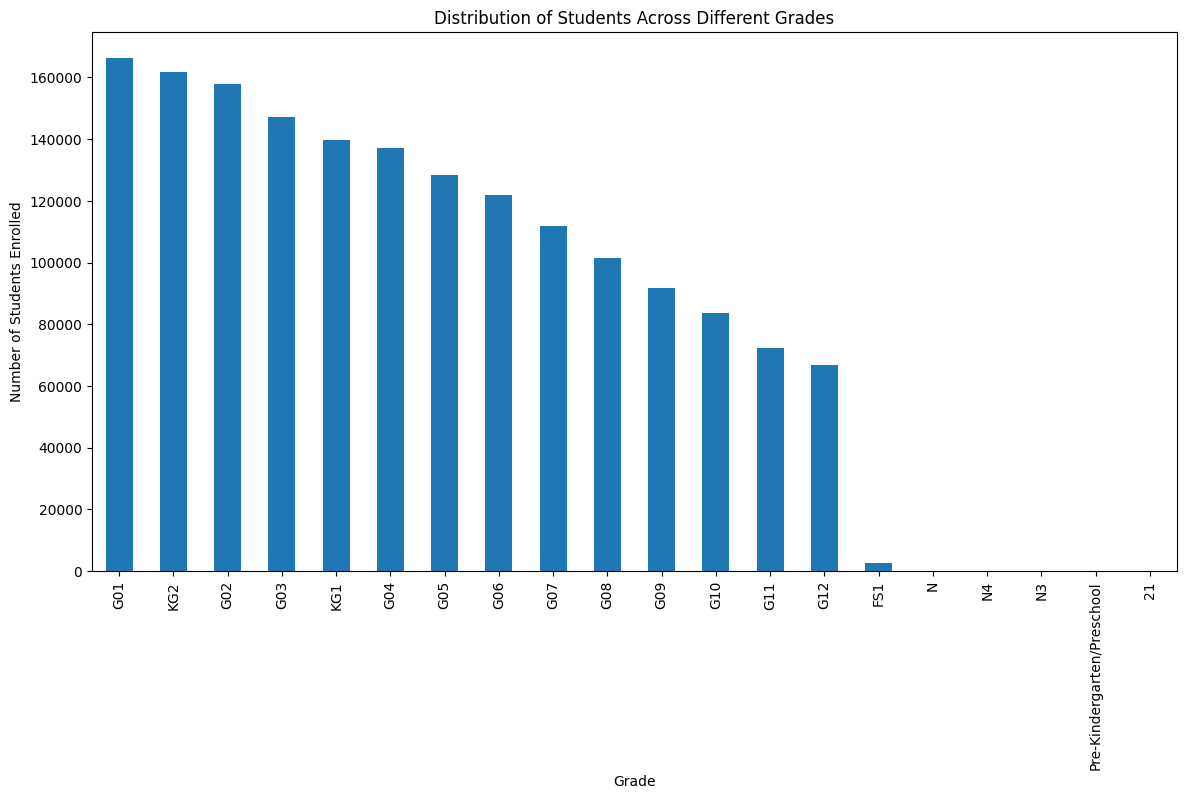

In [92]:
# Grouping by Student Grade and summing the number of students enrolled
grade_df = df3.groupby('STU_GRADE_EN')['N_STUDENTS_ENROLLED'].sum().sort_values(ascending=False)

# Bar Chart Visualization
grade_df.plot(kind='bar', figsize=(14,7))
plt.title('Distribution of Students Across Different Grades')
plt.xlabel('Grade')
plt.ylabel('Number of Students Enrolled')
plt.show()
